In [4]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

In [5]:
# Read CSV, parse dates, and set index
csvpath = Path('../Resources/yield.csv')
data = pd.read_csv(csvpath, parse_dates=True, index_col='Date')

In [6]:
# Display top rows
data.head()

,Yield
Date,
1971-08-16,0.5632
1971-08-17,0.7108
1971-08-18,1.0657
1971-08-19,1.1335
1971-08-20,1.0313


<AxesSubplot:xlabel='Date'>

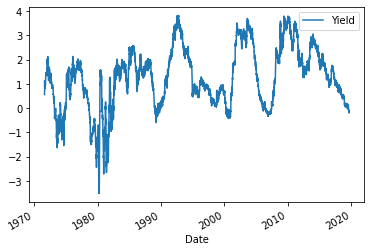

In [7]:
# Plot data
data.plot()

In [8]:
# Test to see if the data is stationary or non-stationary.
# Convert to stationary if needed.
from statsmodels.tsa.stattools import adfuller
adfuller(data.Yield)
#note 3rd output , i.e. usedlagint = The number of lags used = 31. Use this in acf & pacf

(-3.3937213506493342,
 0.01117478159965497,
 31,
 11943,
 {'1%': -3.430897660224935,
  '5%': -2.861782037578331,
  '10%': -2.566898831549907},
 -34557.309891380675)

# Autocorrelation and Partial Autocorrelation Analysis

Use the autocorrelation and partial autocorrelation data to get a sense of how many lags to use in the ARMA model.

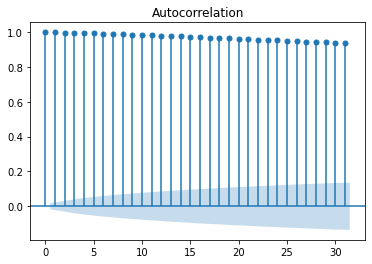

In [9]:
# Plot the autocorrelation of the yield data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data, lags=31);

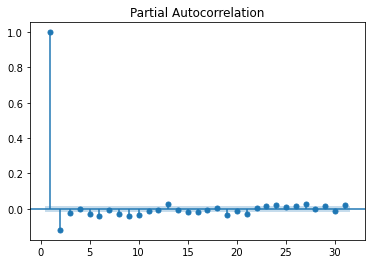

In [10]:
# Plot the partial autocorrelation of the yield data
plot_pacf(data, zero=False, lags=31);

How many lags should be used in the ARMA model?

The autocorrelation plot shows that all lags could potentially be useful. 

However, the partial autocorrelation plot shows most of the trend is in the first two lags.

# ARMA Model

Create an ARMA model and fit it to the data. Output the summary table and take note of the p-values of the lags.

Plot the Forecast for the next 5 days of yield changes

In [20]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(data.values, order=(2, 2)) #2nd Order
#model = ARMA(data.values, order=(1, 1)) #1st Order
result = model.fit()
result.summary()

C:\Users\Chris Chan\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                11975
Model:                     ARMA(2, 2)   Log Likelihood               17294.672
Method:                       css-mle   S.D. of innovations              0.057
Date:                Mon, 19 Apr 2021   AIC                         -34577.344
Time:                        19:57:43   BIC                         -34533.001
Sample:                             0   HQIC                        -34562.468
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1813      0.318      3.712      0.000       0.558       1.805
ar.L1.y        1.9150      0.004    480.405      0.000       1.907       1.923
ar.L2.y       -0.9152      0.004   -229.970      0.000      -0.923      -0.907
ma.L1.y       -0.8032      0.010    -81.152      0.000      -0.823      -0.784
ma.L2.y       -0.0694      0.009     -7.668      0.000      -0.087      -0.052
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0025           +0.0000j            1.0025            0.0000
AR.2            1.0900           +0.0000j            1.0900            0.0000
MA.1            1.1340           +0.0000j            1.1340            0.0000
MA.2          -12.7068           +0.0000j           12.7068            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Yield Forecast'}>

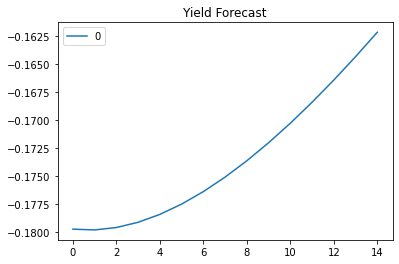

In [24]:
# Forecasting the future
pd.DataFrame(result.forecast(steps=15)[0]).plot(title="Yield Forecast")